# Solving an Ordinary Differential Equation (ODE) with Neural Networks
This notebook demonstrates the application of neural networks to solve an ordinary differential equation (ODE):

\begin{cases}
y' + y = 0, \\
y(0) = 1.
\end{cases}

The exact solution of this ODE is:

$$ y = e^{-t}. $$

### Objective
The goal is to approximate the solution of this ODE using a Multilayer Perceptron. This involves:
- Constructing a loss function based on the ODE.
- Training the neural network to minimize the loss function.
- Comparing the neural network's predictions with the analytical solution.

This approach demonstrates the flexibility of neural networks in approximating complex mathematical problems.
Relevant code components, including custom loss functions and MLP models, are implemented in the `Imports` folder.

# Importing Necessary Libraries
We start by importing essential libraries and modules for numerical computation, visualization, and building neural networks.

In [46]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
sns.set_theme()

from Imports import HP_Tuning, Models, Loss_functions, Solution_precision
importlib.reload(HP_Tuning)
importlib.reload(Models)
importlib.reload(Loss_functions)
importlib.reload(Solution_precision)

# Importing specific functions and classes
from Imports.HP_Tuning import HpTuningOnPlateau, HpTuningCosine
from Imports.Models import ModelTrainerOnPlateau, ModelTrainerCosine
from Imports.Loss_functions import loss_fn_exp, compute_derivative
from Imports.Solution_precision import compute_atol

# Defining the Time Interval

We define the time interval \([0, 10]\) with 1000 points, reshaped into a column vector for compatibility with the neural network.


In [32]:
t = tf.linspace(0.0, 10.0, 1000)
t = tf.reshape(t, (-1, 1))

# Hyperparameter Tuning

We perform hyperparameter tuning using random search and Optuna for two types of activation functions: `tanh` and `relu`.


In [4]:
# Tuning for the model with 'tanh' activation function
cosine_params_tanh_tuner = HpTuningCosine(t, "tanh", loss_fn_exp, epochs=30, decay_steps=1000, n_trials=50, n_layers=(1, 15), n_units=(32, 256))
cosine_params_tanh = cosine_params_tanh_tuner.hp_tuning()

[I 2024-12-30 12:52:10,368] A new study created in memory with name: no-name-24418681-fad2-4262-b110-c9d3903abc92


[I 2024-12-30 12:52:14,998] Trial 0 finished with value: 0.012465139850974083 and parameters: {'n_layers': 10, 'units': 84, 'learning_rate': 0.0003901127740986487}. Best is trial 0 with value: 0.012465139850974083.
[I 2024-12-30 12:52:22,039] Trial 1 finished with value: 0.0061447592452168465 and parameters: {'n_layers': 13, 'units': 133, 'learning_rate': 0.00018768690719362735}. Best is trial 1 with value: 0.0061447592452168465.
[I 2024-12-30 12:52:23,409] Trial 2 finished with value: 0.23544183373451233 and parameters: {'n_layers': 2, 'units': 137, 'learning_rate': 0.008777471164533602}. Best is trial 1 with value: 0.0061447592452168465.
[I 2024-12-30 12:52:30,442] Trial 3 finished with value: 0.017805900424718857 and parameters: {'n_layers': 12, 'units': 250, 'learning_rate': 0.00045744957130839373}. Best is trial 1 with value: 0.0061447592452168465.
[I 2024-12-30 12:52:36,282] Trial 4 finished with value: 0.680008590221405 and parameters: {'n_layers': 11, 'units': 202, 'learning_ra

Tuning time: 218.97998690605164s
Best params: {'n_layers': 12, 'units': 61, 'learning_rate': 0.00476772334343551}


In [5]:
# Tuning for the model with 'relu' activation function
cosine_params_relu_tuner = HpTuningCosine(t, "relu", loss_fn_exp, epochs=30, decay_steps=1000, n_trials=50, n_layers=(1, 15), n_units=(32, 256))
cosine_params_relu = cosine_params_relu_tuner.hp_tuning()

[I 2024-12-30 12:55:49,376] A new study created in memory with name: no-name-186dbcc1-3363-4c6e-b1a2-37d5b1e3e354
[I 2024-12-30 12:55:52,637] Trial 0 finished with value: 0.05785910412669182 and parameters: {'n_layers': 11, 'units': 73, 'learning_rate': 0.0011706951616758598}. Best is trial 0 with value: 0.05785910412669182.
[I 2024-12-30 12:55:54,066] Trial 1 finished with value: 0.9368422627449036 and parameters: {'n_layers': 4, 'units': 69, 'learning_rate': 0.0001165811720254137}. Best is trial 0 with value: 0.05785910412669182.
[I 2024-12-30 12:55:56,338] Trial 2 finished with value: 0.09299784898757935 and parameters: {'n_layers': 8, 'units': 48, 'learning_rate': 0.0020609542622981366}. Best is trial 0 with value: 0.05785910412669182.
[I 2024-12-30 12:56:02,901] Trial 3 finished with value: 0.02561636082828045 and parameters: {'n_layers': 14, 'units': 237, 'learning_rate': 0.00024724835182308487}. Best is trial 3 with value: 0.02561636082828045.
[I 2024-12-30 12:56:05,546] Trial 4

Tuning time: 194.76705646514893s
Best params: {'n_layers': 14, 'units': 207, 'learning_rate': 0.0016210153251598285}


# Model Compilation and Training

We compile and train the models using the chosen hyperparameters for both activation functions (`tanh` and `relu`).


Starting model training...
Epoch 0, Loss: [[1.003652]]
Epoch 100, Loss: [[4.7649264e-05]]
Epoch 200, Loss: [[3.0392853e-06]]
Epoch 300, Loss: [[1.7817714e-06]]
Epoch 400, Loss: [[1.4772122e-06]]
Epoch 500, Loss: [[1.2767085e-06]]
Epoch 600, Loss: [[1.1383231e-06]]
Epoch 700, Loss: [[1.044483e-06]]
Epoch 800, Loss: [[9.828836e-07]]
Epoch 900, Loss: [[9.4284064e-07]]
Epoch 999, Loss: [[9.1390285e-07]]
Final model training completed with loss: 9.13902852062165e-07
Time taken: 13.571651935577393 seconds


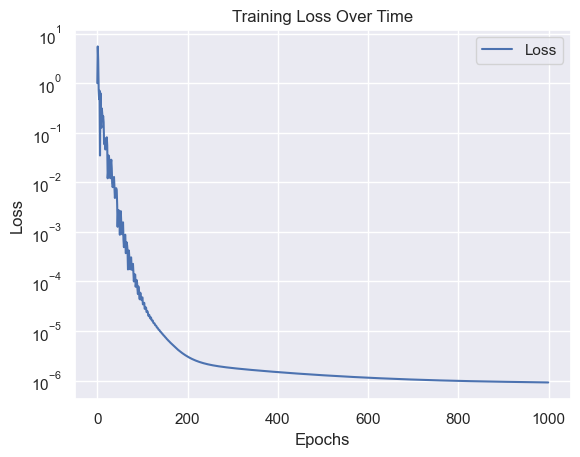

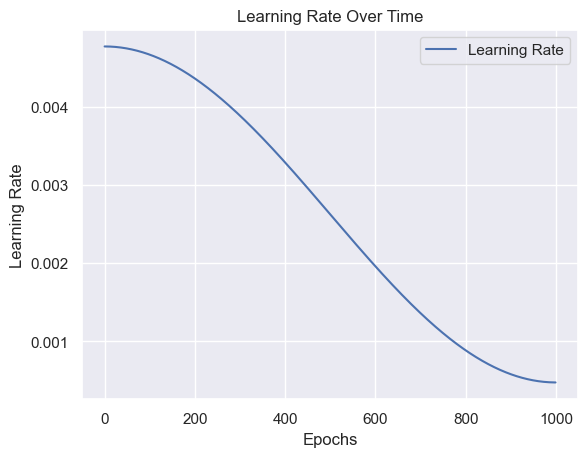

In [33]:
# Training model with 'tanh' activation function
model_1 = ModelTrainerCosine(params=cosine_params_tanh, activation_function="tanh", loss_function=loss_fn_exp, decay_steps=1000, data_aug=False)

epochs = 1000
model_1.train(t, epochs) 

# Visualizing loss and learning rate history
model_1.plot_loss()
model_1.plot_lr_history()

Starting model training...
Epoch 0, Loss: [[1.0002607]]
Epoch 100, Loss: [[0.00107726]]
Epoch 200, Loss: [[0.00502211]]
Epoch 300, Loss: [[0.0008279]]
Epoch 400, Loss: [[0.00103611]]
Epoch 500, Loss: [[0.00095675]]
Epoch 600, Loss: [[0.00040067]]
Epoch 700, Loss: [[7.1690054e-05]]
Epoch 800, Loss: [[7.8979254e-05]]
Epoch 900, Loss: [[4.4986966e-05]]
Epoch 999, Loss: [[3.6546928e-05]]
Final model training completed with loss: 3.6546927731251344e-05
Time taken: 46.78633761405945 seconds


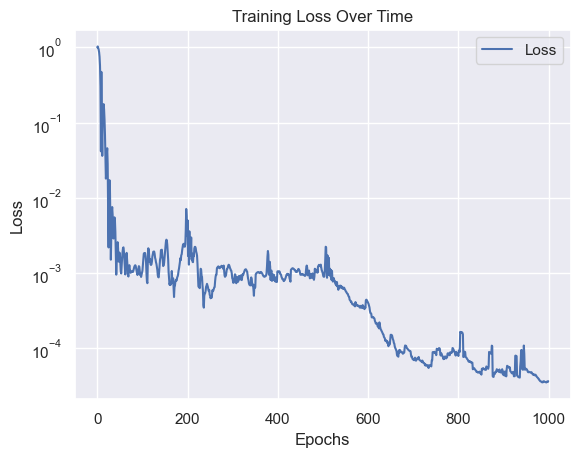

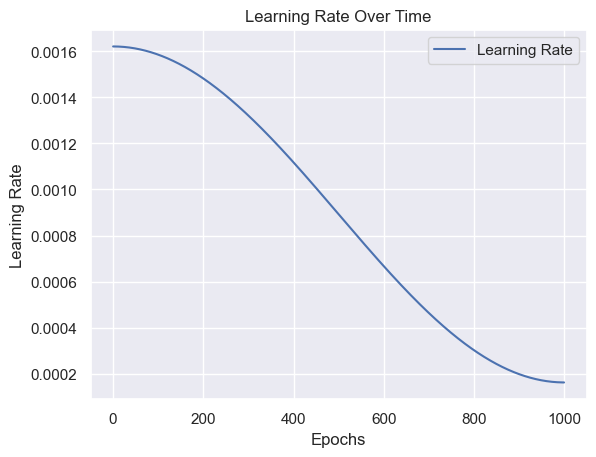

In [36]:
# Training model with 'relu' activation function
model_2 = ModelTrainerCosine(params=cosine_params_relu, activation_function="relu", loss_function=loss_fn_exp, decay_steps=1000, data_aug=False)

epochs = 1000
model_2.train(t, epochs)

# Visualizing loss and learning rate history
model_2.plot_loss()
model_2.plot_lr_history()

# Solution Precision Analysis

We evaluate the precision of the models by comparing their predictions to the analytical solution.


In [37]:
def solution(x):
    """Exact analytical solution for given ODE."""
    return tf.exp(-x)

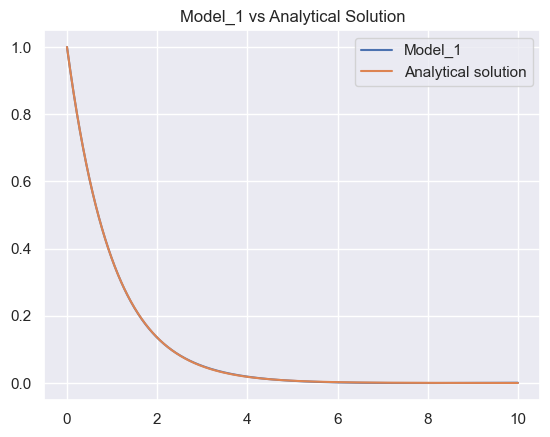

In [38]:
# Plotting model_1 predictions vs analytical solution
plt.plot(t, model_1(t), label="Model_1")
plt.plot(t, solution(t), label="Analytical solution")
plt.legend()
plt.title("Model_1 vs Analytical Solution")
plt.show()

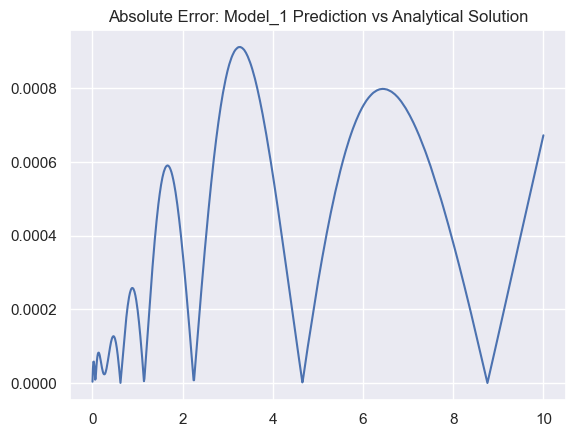

In [39]:
# Plotting the absolute error for model_1
plt.plot(t, abs(solution(t) - model_1(t)))
plt.title("Absolute Error: Model_1 Prediction vs Analytical Solution")
plt.show()

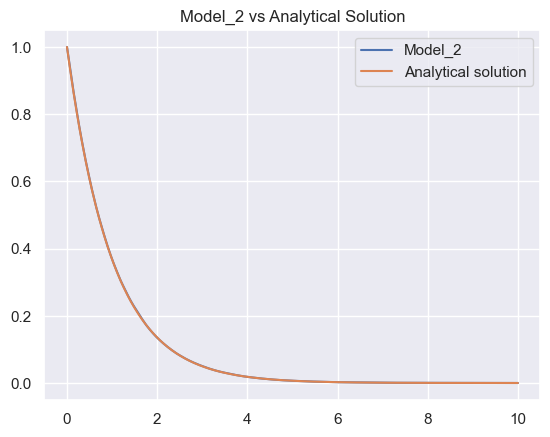

In [40]:
# Plotting model_2 predictions vs analytical solution
plt.plot(t, model_2(t), label="Model_2")
plt.plot(t, solution(t), label="Analytical solution")
plt.legend()
plt.title("Model_2 vs Analytical Solution")
plt.show()


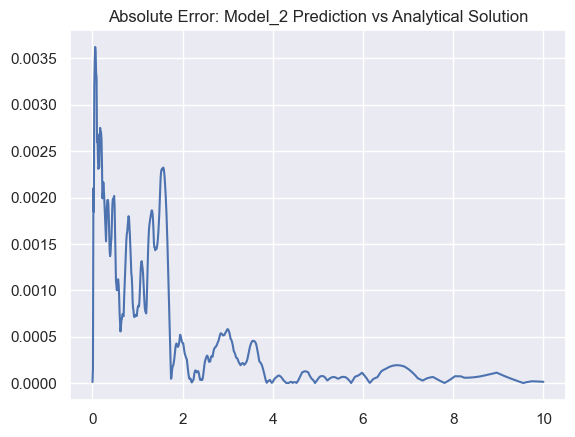

In [41]:
# Plotting the absolute error for model_2
plt.plot(t, abs(solution(t) - model_2(t)))
plt.title("Absolute Error: Model_2 Prediction vs Analytical Solution")
plt.show()

# Mean Squared Error (MSE) and Absolute Tolerance

We compute the Mean Squared Error (MSE) and absolute tolerance for both models.

In [49]:
mse = tf.keras.losses.MeanSquaredError()

# Evaluating metrics for Model 1
print("Model 1")
compute_atol(t, model_1, solution, verbose=1)
print("Mean Squared Error:", mse(model_1(t), solution(t)).numpy())

# Evaluating metrics for Model 2
print("Model 2")
compute_atol(t, model_2, solution, verbose=1)
print("Mean Squared Error:", mse(model_2(t), solution(t)).numpy())

Model 1
Absolute tolerance: 0.000911615788936615
Mean Squared Error: 2.700336e-07
Model 2
Absolute tolerance: 0.0036229491233825684
Mean Squared Error: 5.2059283e-07


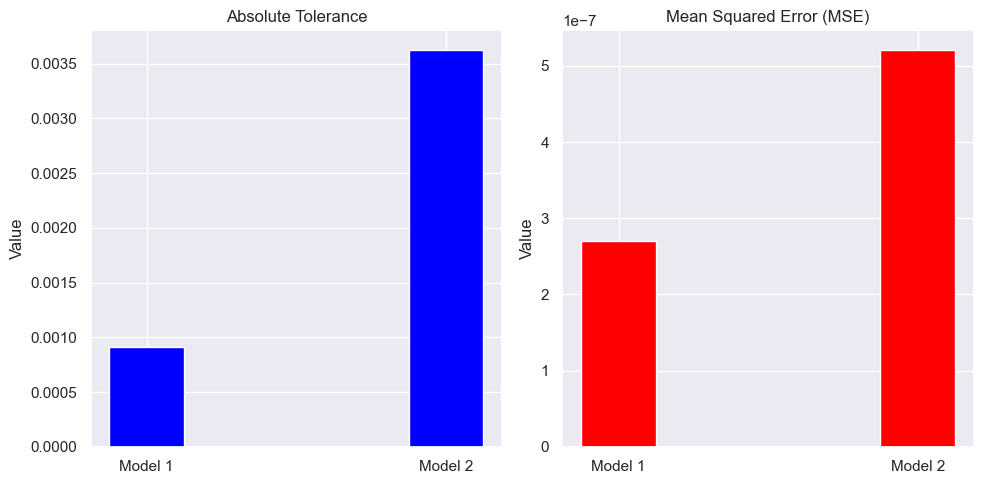

In [50]:
# Preparing data for bar plots
models = ["Model 1", "Model 2"]
models_to_compute = [model_1, model_2]
absolute_tolerance, mse_values = [], []

for model in models_to_compute:
    atol = compute_atol(t, model, solution)
    absolute_tolerance.append(atol)
    mse_values.append(mse(model(t), solution(t)).numpy())

# Plotting metrics
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
bar_width = 0.25
x = np.arange(len(models))

# Absolute Tolerance
axs[0].bar(x, absolute_tolerance, color='blue', width=bar_width)
axs[0].set_title("Absolute Tolerance")
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].set_ylabel("Value")

# Mean Squared Error
axs[1].bar(x, mse_values, color='red', width=bar_width)
axs[1].set_title("Mean Squared Error (MSE)")
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].set_ylabel("Value")

plt.tight_layout()
plt.show()

The results indicate that the model using the `tanh` activation function outperforms the one with `ReLU` in solving the given ODE. This is evidenced by the smaller absolute tolerance (atol) and mean squared error (MSE) values for the tanh-based model. The superior performance of `tanh` can be attributed to its smoothness and ability to approximate continuous functions more effectively. In contrast, the non-smooth nature of `ReLU` and its tendency for higher-order derivatives to vanish make it less suitable for accurately solving differential equations, particularly those of higher order. Furthermore, model with `ReLU` required significantly more neurons ($14$ layers with $207$ neurons each) and training time ($\approx 46.79s$) compared to the one with `tanh` activation function ($12$ layers, $61$ neurons per layer, and $\approx 13.57s$ training time). To substantiate these findings, we will conduct further analysis.

# Higher-Order Derivatives of the Network Output

We analyze the higher-order derivatives of the models' outputs to evaluate their smoothness and accuracy. For analytical solution, each of the derivatives should be equal to $e^{-t}$ with respect to its absolute value. Therefore, we analyze the absolute values, as they are easier to compare visually.

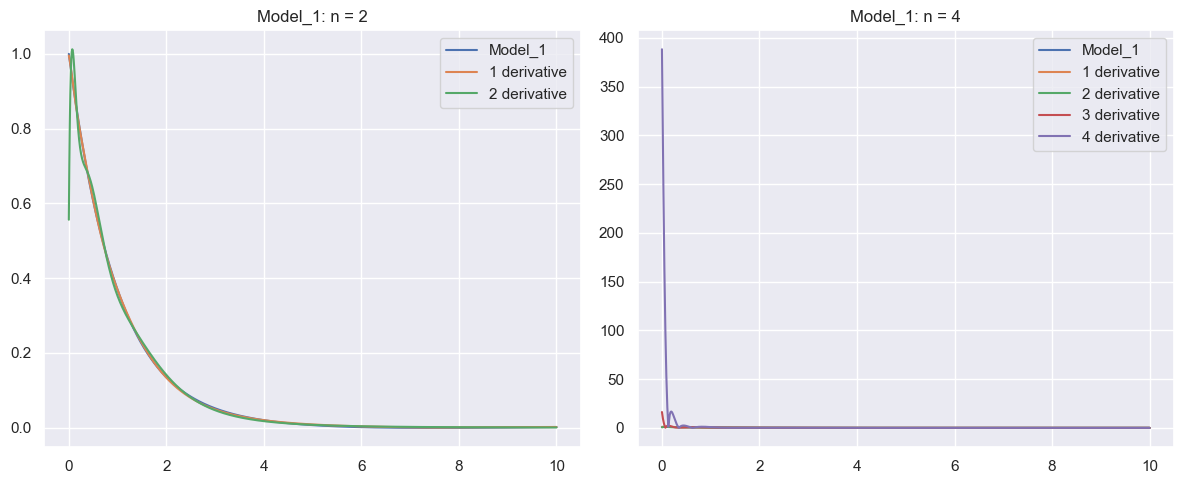

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Model 1: First and second derivatives
axs[0].plot(t, model_1(t), label="Model_1")
n = 2
dts = compute_derivative(model_1, t, order=n)
for i in range(n):
    axs[0].plot(t, abs(dts[i]), label=f"{i+1} derivative")
axs[0].legend()
axs[0].set_title("Model_1: n = 2")

# Model 1: Higher-order derivatives
axs[1].plot(t, model_1(t), label="Model_1")
n = 4
dts = compute_derivative(model_1, t, order=n)
for i in range(n):
    axs[1].plot(t, abs(dts[i]), label=f"{i+1} derivative")
axs[1].legend()
axs[1].set_title("Model_1: n = 4")

plt.tight_layout()
plt.show()


We observe that while the first derivative is accurate, numerical errors grow rapidly with higher-order derivatives. Nevertheless, the outputs remain smooth because of `tanh` differentiability.


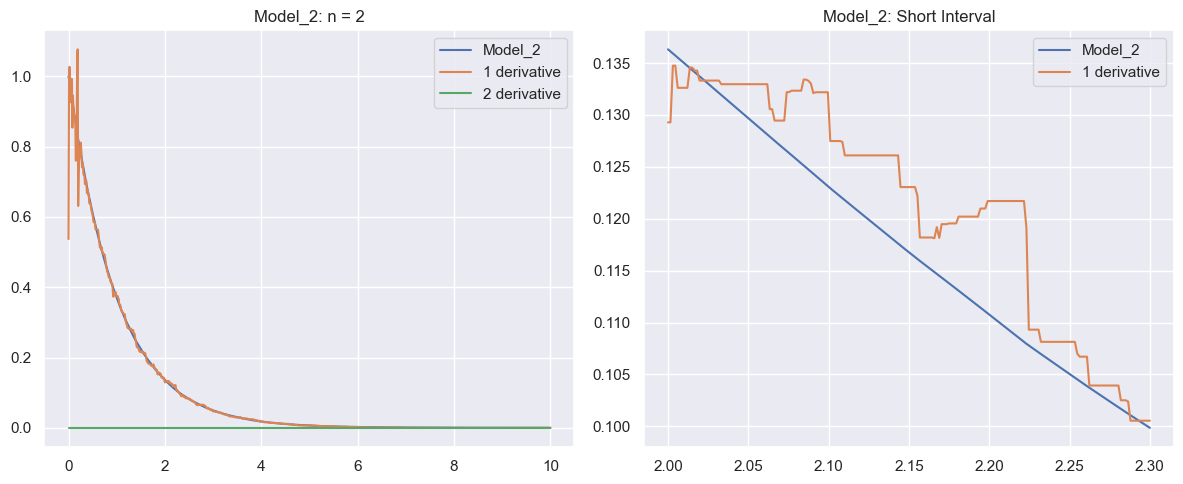

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Model 2: First and second derivatives
axs[0].plot(t, model_2(t), label="Model_2")
n = 2
dts = compute_derivative(model_2, t, order=n)
for i in range(n):
    axs[0].plot(t, abs(dts[i]), label=f"{i+1} derivative")
axs[0].legend()
axs[0].set_title("Model_2: n = 2")

# Model 2: Short time interval
n=1
t_short = tf.linspace(2.0, 2.3, 200)
t_short = tf.reshape(t_short, (-1, 1))
axs[1].plot(t_short, model_2(t_short), label="Model_2")
dts = compute_derivative(model_2, t_short, order=n)
for i in range(n):
    axs[1].plot(t_short, abs(dts[i]), label=f"{i+1} derivative")
axs[1].legend()
axs[1].set_title("Model_2: Short Interval")

plt.tight_layout()
plt.show()

While `Model_2` predictions are smooth (or at least appears so), the characteristics of `ReLU` activation function leads to non-smooth first derivative, which diminishes accuracy for given ODE. Also, the vanishing of second and higher-order derivatives makes `ReLU` unsuitable for higher-order ODEs.
